[**Neural Network From Scratch Using Numpy**
](https://)
*   List item
*   List item




Neural Network is a collection of neurons (computing units), put in the structure of layers and modeled in the same way the human brain makes it computation. This configuration allows performing pattern recognition tasks such as image classification.

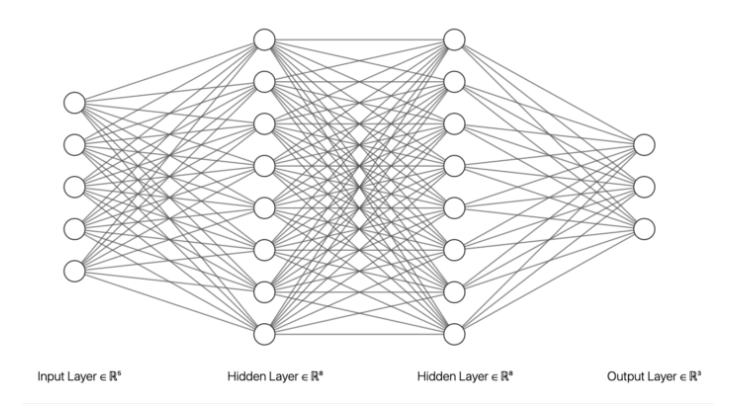

Perceptron is the mathematical model of biological neuron introduced in 1958. A combination of perceptrons put into the layers is called Neural Network. The prefix “Deep” is given when there is more than one hidden layer.``


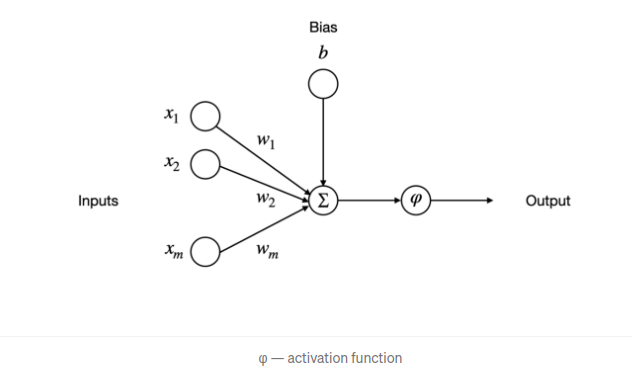

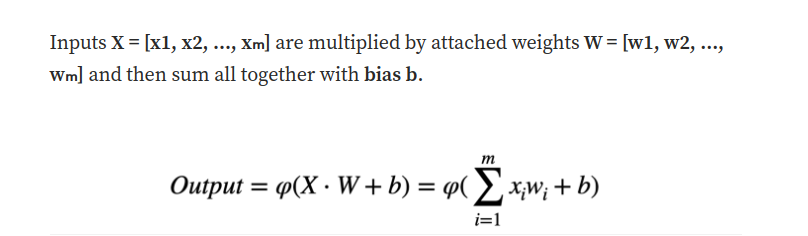

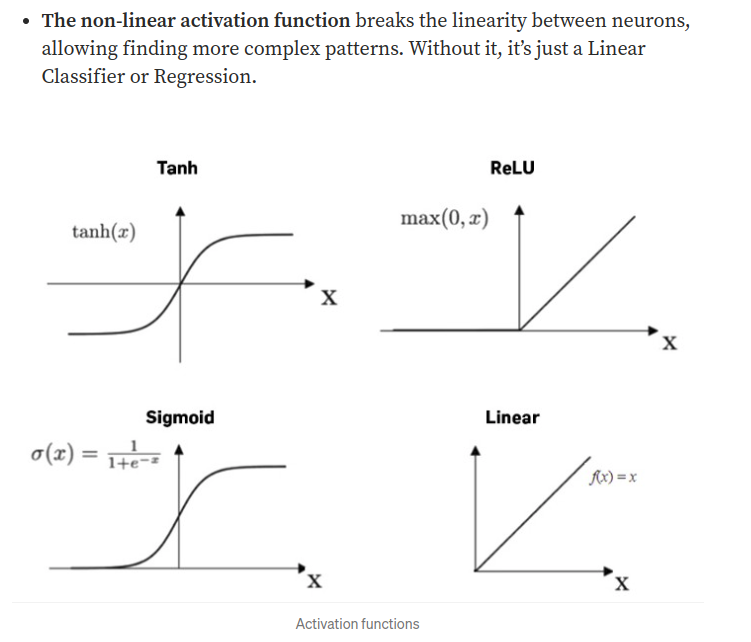

So why do we have weights and biases?

Weights are describing the strength of the connection between neurons.
Bias can shift the activation function thus the neuron needs a lower or higher value to fire.

Training process

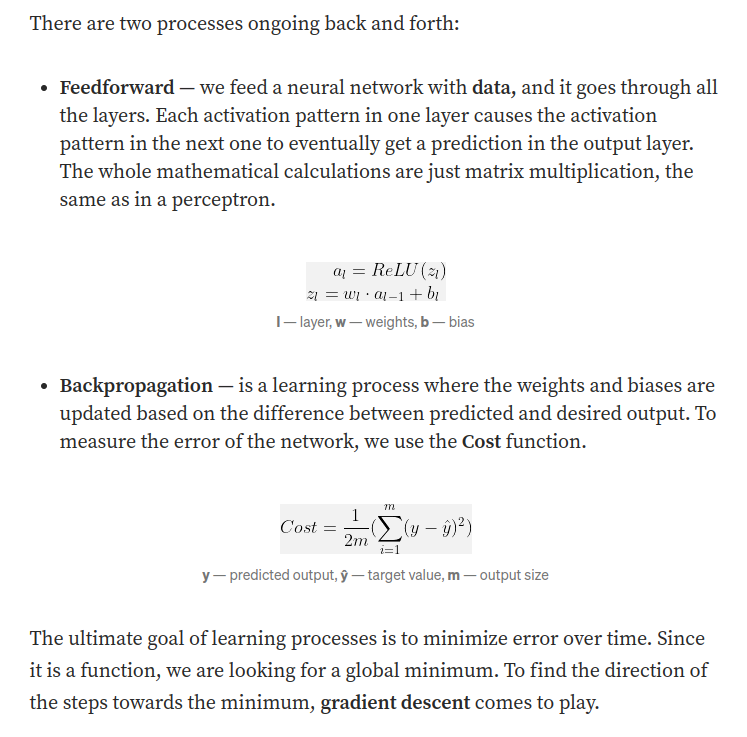

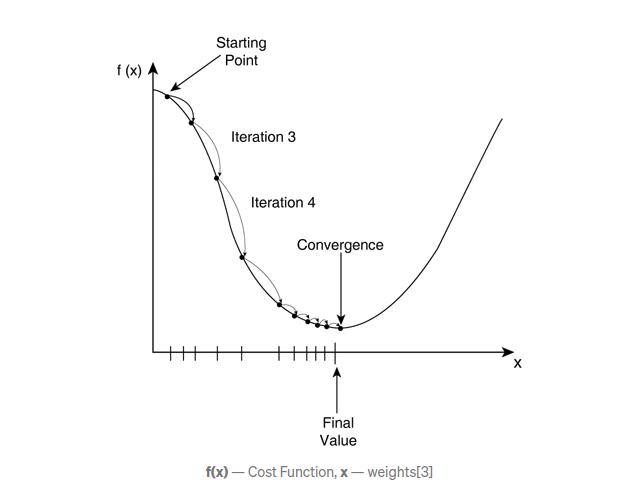

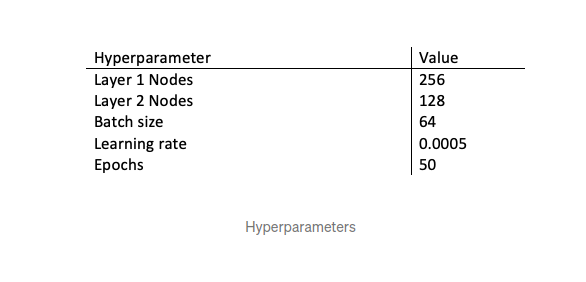

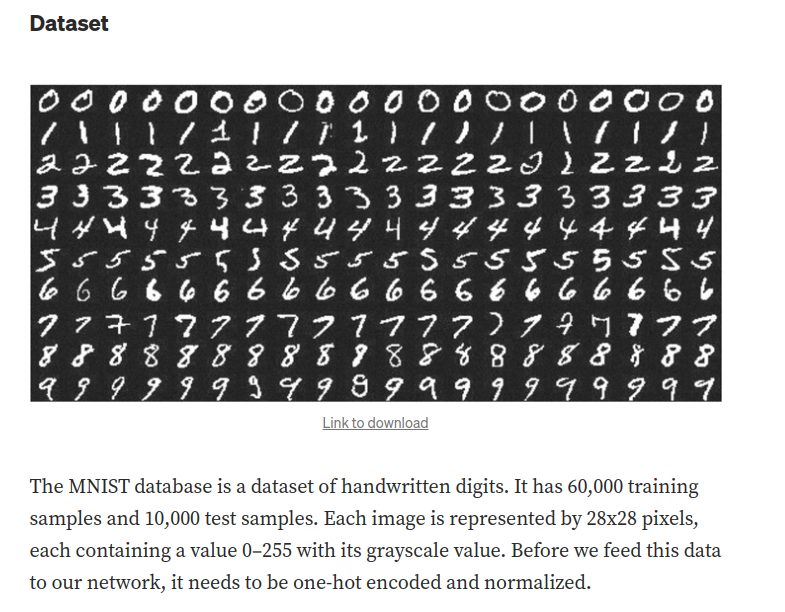

### Loading Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Preprare Data
def load_data(path):
    def one_hot(y):
        table = np.zeros((y.shape[0], 10))
        for i in range(y.shape[0]):
            table[i][int(y[i][0])] = 1
        return table

    def normalize(x):
        x = x / 255
        return x

    data = np.genfromtxt('{}'.format(path), delimiter = ',', skip_header=1)
    print(data)
    return normalize(data[:,1:]),one_hot(data[:,:1])

X_train, y_train = load_data('/content/mnist_train.csv')
X_test, y_test = load_data('/content/mnist_test.csv')

[[5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]]
[[7. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [4. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]]


(60000, 784)
(60000, 10)
Accuracy: 87.9 %


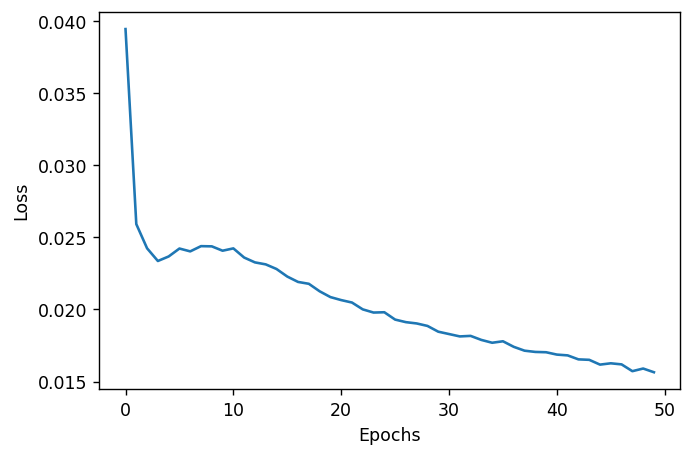

In [ ]:
#Initialise Neural Network
class NeuralNetwork:
    # initialize the neural network
    def __init__(self, X, y, batch = 64, lr = 5e-3,  epochs = 50):
        self.input = X
        self.target = y
        y = np.reshape(y.shape[0], 1)
        self.batch = batch
        self.epochs = epochs
        self.lr = lr
        # these are empty lists for passing values
        self.x = [] # batch input
        self.y = [] # batch target value
        # these are empty list for storing values.
        self.loss = []
        self.acc = []
        # weight initialization
        self.init_weights()


    # method for wights and biases initialization
    def init_weights(self):
        self.W1 = np.random.randn(self.input.shape[1],256)
        self.W2 = np.random.randn(self.W1.shape[1],128)
        self.W3 = np.random.randn(self.W2.shape[1],10)

        self.b1 = np.random.randn(self.W1.shape[1],)
        self.b2 = np.random.randn(self.W2.shape[1],)
        self.b3 = np.random.randn(self.W3.shape[1],)

    #Activation functions
    def ReLU(self, x):
        return np.maximum(0,x)

    def dReLU(self,x):
        return 1 * (x > 0)

    def softmax(self, z):
        z = z - np.max(z, axis = 1).reshape(z.shape[0],1)
        return np.exp(z) / np.sum(np.exp(z), axis = 1).reshape(z.shape[0],1)

    #Feedforward
    def feedforward(self):
      assert self.x.shape[1] == self.W1.shape[0]
      self.z1 = self.x.dot(self.W1) + self.b1
      self.a1 = self.ReLU(self.z1)

      assert self.a1.shape[1] == self.W2.shape[0]
      self.z2 = self.a1.dot(self.W2) + self.b2
      self.a2 = self.ReLU(self.z2)

      assert self.a2.shape[1] == self.W3.shape[0]
      self.z3 = self.a2.dot(self.W3) + self.b3
      self.a3 = self.softmax(self.z3)
      self.error = self.a3 - self.y

    # Back propagation
    def backprop(self):
      dcost = (1/self.batch)*self.error

      DW3 = np.dot(dcost.T,self.a2).T
      DW2 = np.dot((np.dot((dcost),self.W3.T) * self.dReLU(self.z2)).T,self.a1).T
      DW1 = np.dot((np.dot(np.dot((dcost),self.W3.T)*self.dReLU(self.z2),self.W2.T)*self.dReLU(self.z1)).T,self.x).T

      db3 = np.sum(dcost,axis = 0)
      db2 = np.sum(np.dot((dcost),self.W3.T) * self.dReLU(self.z2),axis = 0)
      db1 = np.sum((np.dot(np.dot((dcost),self.W3.T)*self.dReLU(self.z2),self.W2.T)*self.dReLU(self.z1)),axis = 0)

      assert DW3.shape == self.W3.shape
      assert DW2.shape == self.W2.shape
      assert DW1.shape == self.W1.shape

      assert db3.shape == self.b3.shape
      assert db2.shape == self.b2.shape
      assert db1.shape == self.b1.shape

      self.W3 = self.W3 - self.lr * DW3
      self.W2 = self.W2 - self.lr * DW2
      self.W1 = self.W1 - self.lr * DW1

      self.b3 = self.b3 - self.lr * db3
      self.b2 = self.b2 - self.lr * db2
      self.b1 = self.b1 - self.lr * db1

    def shuffle(self):
      idx = [i for i in range(self.input.shape[0])]
      np.random.shuffle(idx)
      self.input = self.input[idx]
      self.target = self.target[idx]

    #Training function
    def train(self):
      for epoch in range(self.epochs):
          l = 0
          acc = 0
          self.shuffle()

          for batch in range(self.input.shape[0]//self.batch-1):
              start = batch*self.batch
              end = (batch+1)*self.batch
              self.x = self.input[start:end]
              self.y = self.target[start:end]
              self.feedforward()
              self.backprop()
              l+=np.mean(self.error**2)
              acc+= np.count_nonzero(np.argmax(self.a3,axis=1) == np.argmax(self.y,axis=1)) / self.batch

          self.loss.append(l/(self.input.shape[0]//self.batch))
          self.acc.append(acc*100/(self.input.shape[0]//self.batch))

    #Results
    def plot(self):
        plt.figure(dpi = 125)
        plt.plot(self.loss)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")

    def acc_plot(self):
        plt.figure(dpi = 125)
        plt.plot(self.acc)
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")

    def test(self,xtest,ytest):
        self.x = xtest
        self.y = ytest
        self.feedforward()
        acc = np.count_nonzero(np.argmax(self.a3,axis=1) == np.argmax(self.y,axis=1)) / self.x.shape[0]
        print("Accuracy:", 100 * acc, "%")


print(X_train.shape)
print(y_train.shape)
NN = NeuralNetwork(X_train, y_train)
NN.train()
NN.plot()
NN.test(X_test,y_test)